<a href="https://colab.research.google.com/github/VictorGuui/Predict-The-Weather-with-Machine-Learning/blob/main/O_CMIP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import xarray as xr

In [7]:
%matplotlib inline

In [8]:
pip install cftime

In [9]:
dset = xr.open_dataset("/content/pr_Amon_NorESM1-M_historical_r1i1p1_jan1850-dez2005.nc", decode_times=False)

In [10]:
print(dset)

<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) float64 15.5 45.0 74.5 ... 5.686e+04 5.689e+04 5.692e+04
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorES

- Este arquivo contém dados médios mensais de janeiro de 1850 a dezembro de 2005. No CMIP o nome da variável para o fluxo de precipitação é chamado pr , então vamos dar uma olhada nos metadados


In [11]:
print(dset.pr)

<xarray.DataArray 'pr' (time: 1872, lat: 96, lon: 144)>
[25878528 values with dtype=float32]
Coordinates:
  * time     (time) float64 15.5 45.0 74.5 ... 5.686e+04 5.689e+04 5.692e+04
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           at surface; includes both liquid and solid phases from...
    units:             kg m-2 s-1
    original_name:     PRECT
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2011-06-01T05:45:35Z altered by CMOR: Converted type f...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...


- A unidade é: kg m-2 s-1(units) . Queremos converter as unidades de kg m-2 s-1 para algo com o qual estamos um pouco mais familiarizados, como mm dia-1 ou m dia-1 (metro por dia), que foi o que tivemos com o ERA5.

- Para isso, considere que 1 kg de água da chuva espalhado por 1 m2 de superfície tem 1 mm de espessura e que um dia dura 86.400 segundos. Portanto, 1 kg m-2 s-1 = 86.400 mm dia-1 ou 86,4 m dia-1.

In [35]:
dset.pr.data = dset.pr.data * 86.4
dset.pr.attrs['units'] = 'm/day'

In [13]:
import matplotlib.pyplot as plt

In [15]:
pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.9 MB/s eta 0:00:00


In [16]:
import cartopy.crs as ccrs

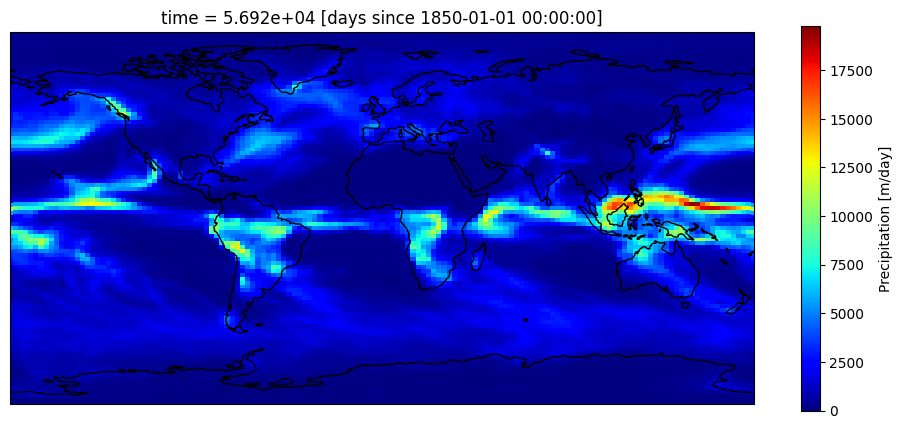

In [36]:
fig = plt.figure(figsize=[12, 5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

# Use the 'method' keyword argument to select the nearest time point
dset['pr'].sel(time='200306', method='nearest').plot(ax=ax, cmap='jet', transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

- selecionamos os dados de junho de 2003 e traçamos o campo de precipitação

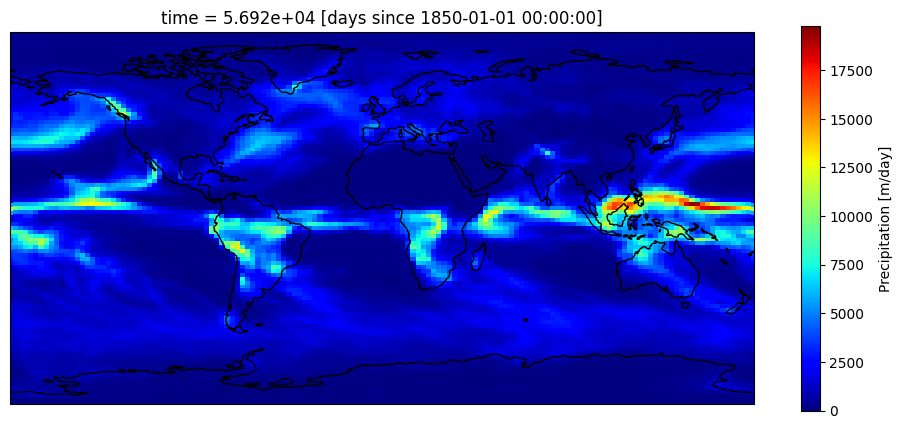

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Selecionar dados para junho de 2003, usando 'method' para encontrar o horário mais próximo
dados_junho_2003 = dset['pr'].sel(time='200306', method='nearest')

# Criar uma figura
fig = plt.figure(figsize=[12, 5])

# Criar um subplot com projeção PlateCarree
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

# Plotar os dados selecionados
dados_junho_2003.plot(ax=ax, cmap='jet', transform=ccrs.PlateCarree())

# Adicionar contornos costeiros
ax.coastlines()

# Mostrar o gráfico
plt.show()



In [38]:
dset['pr'].sel(time=slice('200306', '200406', 12))

<xarray.DataArray 'pr' (time: 0, lat: 96, lon: 144)>
array([], shape=(0, 96, 144), dtype=float32)
Coordinates:
  * time     (time) float64 
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           at surface; includes both liquid and solid phases from...
    units:             m/day
    original_name:     PRECT
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2011-06-01T05:45:35Z altered by CMOR: Converted type f...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

Mesmo alterando para m/day-1 continua não ficando igual ao do exemplo

- Para selecionar junho de 2003, usamos xarray select sel. Esta é uma ferramenta muito poderosa com a qual você pode especificar um valor específico que deseja selecionar. Você também pode adicionar um método para nearestselecionar o ponto mais próximo de um determinado valor. Você pode até selecionar todos os valores dentro de um intervalo (inclusive) com slice

<h3>Este comando pega primeiro o mês de junho de 2003, depois salta 12 meses e pega o mês de junho de 2004